### Feature Engineering

Outliers:
* 523, 1298 are maybe outliers because they have lot of connected streets
* See doku: I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students. (Three of them are true outliers)

Categorical Variables:
* Alley: NaN => No Access
* MasVnrType: 4 Nans => Kein Mauerwerk mit einer solchen äusseren Schicht
* Bsmt Qual: 37 Nans => No Basement
* Electrical: 1 Nans => ? 

Ordinal Variables:
* Carefull with KitchenQual for example
* BsmtCond, BsmtFinType1:  37 Nans => Kein Basement
* BsmtExposure, BsmtFinType2: 38 Nans => 37 kein Basement, was ist mit dem 38ten
* FireplaceQu: Lots of Nans => No Fireplace
* GarageType, GarageFinish, GarageQual, GarageCond: => No Garage
* PoolQC: LOTS of nans => kein Pool
* Fence: 80% => No Fence
* MiscFeature: 90% => No special features

Continous Variables:
* MasVnrArea: 8 Nans (is corresponding to None in Type) -> Replace with 0.
* GarageYearBuilt: => No Garage

Possible Features improvements:
* Year sold has to be combined with build year -> AlterDesHausesBeiVerkauf
* Inflation/recession would be interesting to include
* YearRemodAdd is the same as YearBuilt if there was no remodelling - maybe we can drop YearBuilt!
* There are various feature for the basement which coud be remodelled to others

Variables to drop (potentially):
* LowQualFinSF/3SsnPorch/PorchXXX/PoolArea/MiscVal/MoSold?

In [1]:
import pandas as pd
train_df = pd.read_csv('data/train.csv')

In [2]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### MSSubClass - MS SubClass (Nominal): Identifies the type of dwelling involved in the sale.

In [5]:
train_df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [9]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

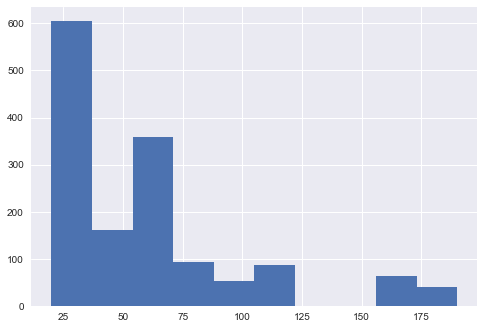

In [13]:
train_df['MSSubClass'].hist()
plt.show()

In [11]:
train_df['MSSubClass'].isnull().any()

False

#### MSZoning- MS Zoning (Nominal): Identifies the general zoning classification of the sale.

In [15]:
train_df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [17]:
train_df['MSZoning'].isnull().any()

False

In [21]:
zonings = train_df['MSZoning'].astype('category')

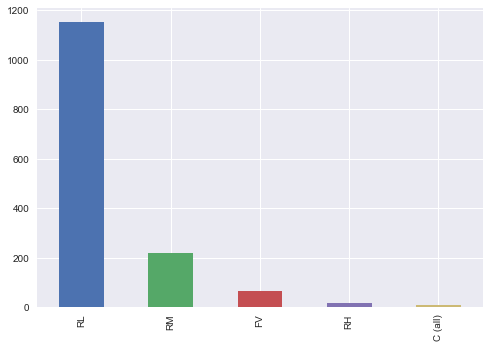

In [40]:
zonings.value_counts().plot(kind='bar')
plt.show()

#### LotFrontage- Lot Frontage (Continuous): Linear feet of street connected to property

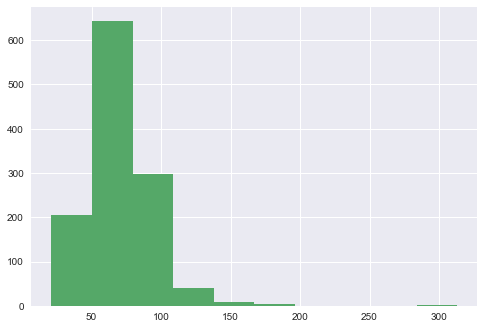

In [43]:
train_df['LotFrontage'].hist()
plt.show()

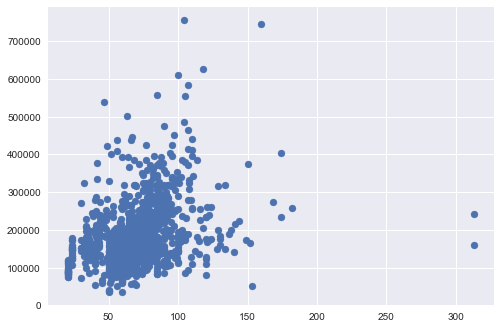

In [46]:
plt.scatter(train_df['LotFrontage'],train_df['SalePrice']) 
plt.show()

In [48]:
train_df[train_df['LotFrontage'] > 300]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Same outliers in lot frontage, meaning that maybe the prices are so small because of the connected streets.

#### LotArea - Lot Area (Continuous): Lot size in square feet

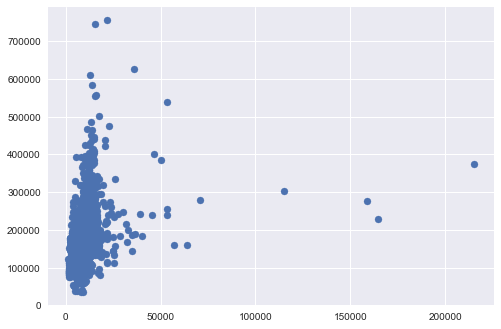

In [49]:
plt.scatter(train_df['LotArea'],train_df['SalePrice']) 
plt.show()

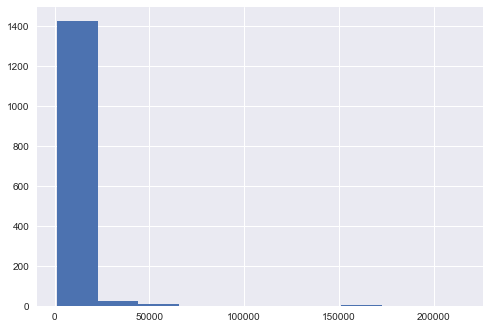

In [50]:
train_df['LotArea'].hist()
plt.show()

#### Street - Street (Nominal): Type of road access to property

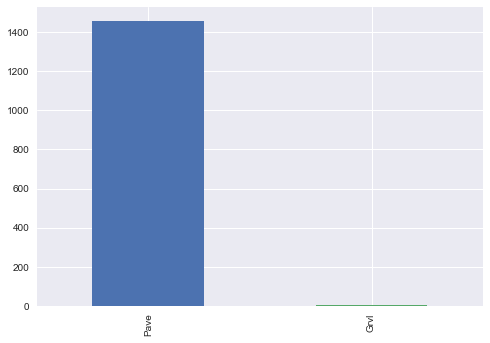

In [51]:
train_df['Street'].value_counts().plot(kind='bar')
plt.show()

In [65]:
train_df['Street'].isnull().any()

False

#### Alley (Nominal): Type of alley access to property

In [67]:
train_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

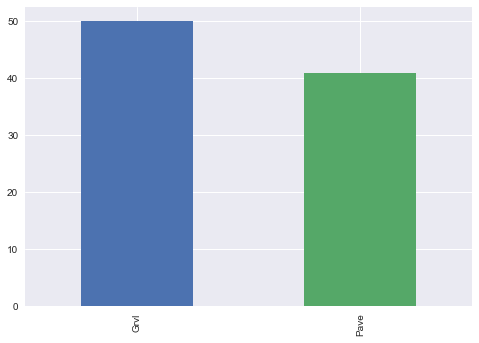

In [68]:
train_df['Alley'].value_counts().plot(kind='bar')
plt.show()

In [71]:
train_df['Alley'].isnull().sum() / len(train_df)

0.93767123287671228

#### LotShape - Lot Shape (Ordinal): General shape of property

In [75]:
train_df['LotShape'].isnull().sum()

0

In [76]:
train_df['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [96]:
train_df.groupby('LotShape')['SalePrice'].mean()

LotShape
IR1    206101.665289
IR2    239833.365854
IR3    216036.500000
Reg    164754.818378
Name: SalePrice, dtype: float64

In [101]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


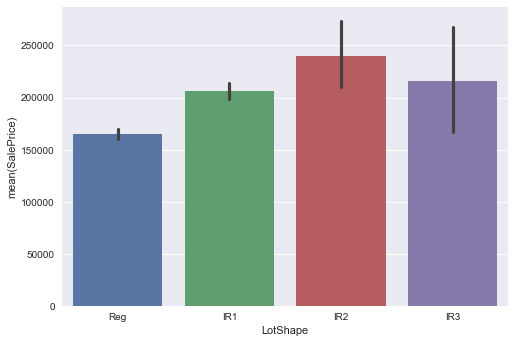

In [105]:
sns.barplot(train_df['LotShape'], train_df['SalePrice'])
plt.show()

#### Land Contour (Nominal): Flatness of the property

In [106]:
train_df['LandContour'].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


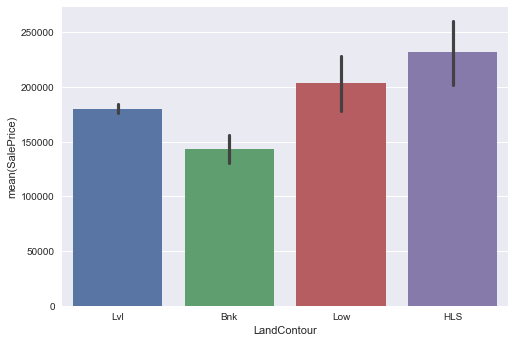

In [107]:
sns.barplot(train_df['LandContour'], train_df['SalePrice'])
plt.show()

#### Utilities (Ordinal): Type of utilities available

In [108]:
train_df['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


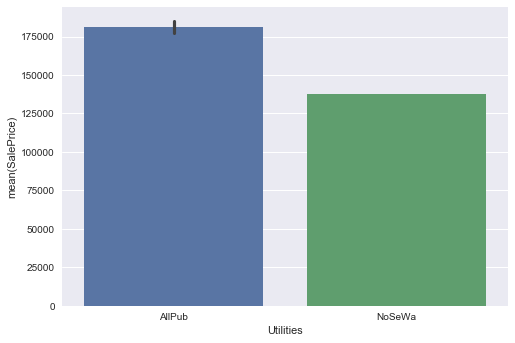

In [109]:
sns.barplot(train_df['Utilities'], train_df['SalePrice'])
plt.show()

#### Lot Config (Nominal): Lot configuration

In [111]:
train_df['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


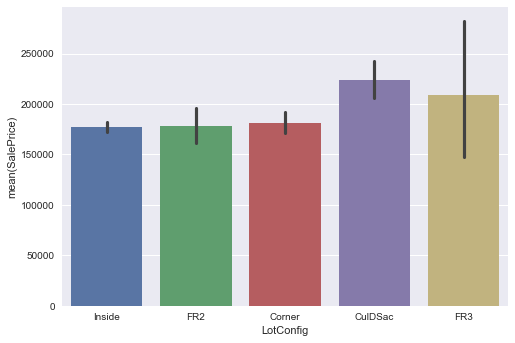

In [113]:
sns.barplot(train_df['LotConfig'], train_df['SalePrice'])
plt.show()

#### Land Slope (Ordinal): Slope of property

In [221]:
def show_categorical(feature):
    print(train_df[feature].unique())
    sns.barplot(train_df[feature], train_df['SalePrice'])
    plt.show()
    print('Has null: %s' % train_df[feature].isnull().any())
    if train_df[feature].isnull().any():
        print('Number of nulls: %s' % train_df[feature].isnull().sum())
        print('Percentage of nulls: %.4f' % (train_df[feature].isnull().sum() / len(train_df)))

['Gtl' 'Mod' 'Sev']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


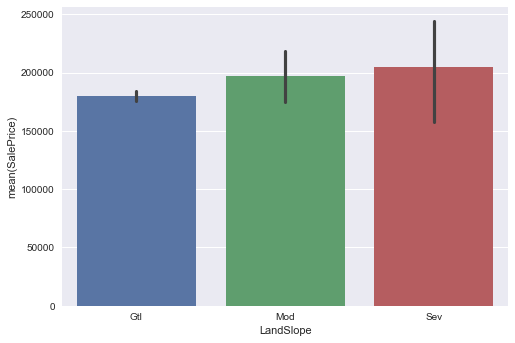

In [115]:
show_categorical('LandSlope')

#### Neighborhood (Nominal): Physical locations within Ames city limits (map available)

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


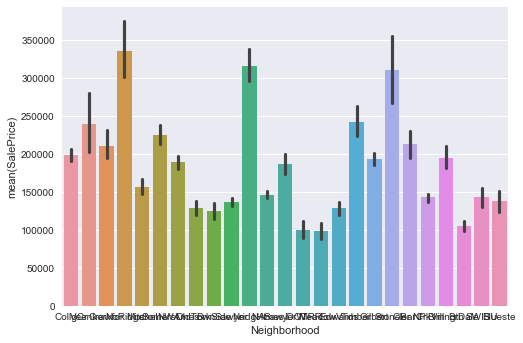

Has null: False


In [121]:
show_categorical('Neighborhood')

#### Condition 1 (Nominal): Proximity to various conditions

['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


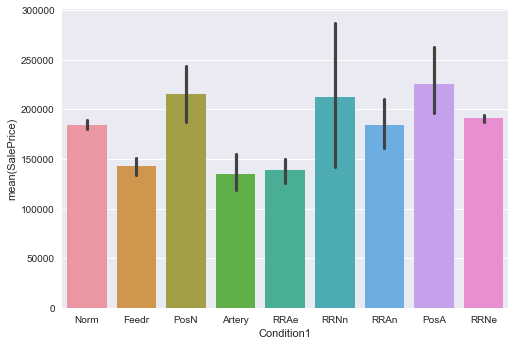

Has null: False


In [123]:
show_categorical('Condition1')

#### Condition 2 (Nominal): Proximity to various conditions (if more than one is present)

['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


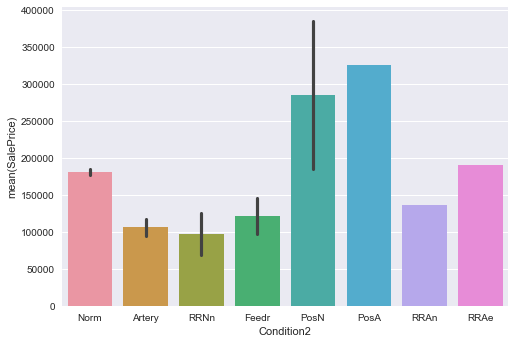

Has null: False


In [125]:
show_categorical('Condition2')

In [139]:
#### Bldg Type (Nominal): Type of dwelling

['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


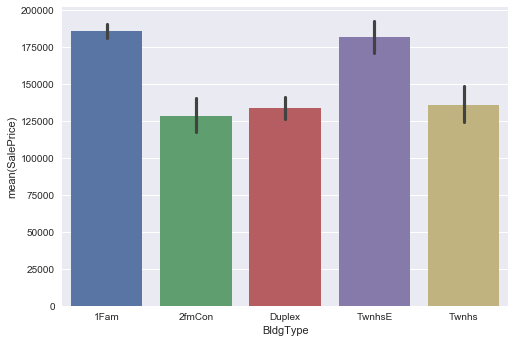

Has null: False


In [140]:
show_categorical('BldgType')

In [141]:
#### House Style (Nominal): Style of dwelling

['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


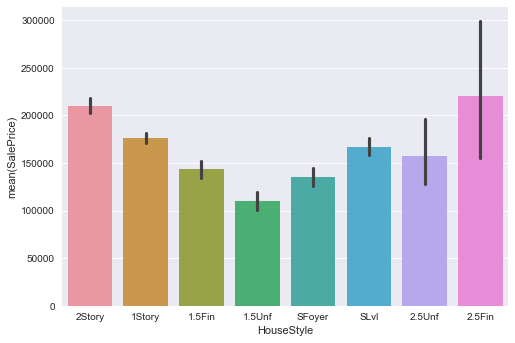

Has null: False


In [142]:
show_categorical('HouseStyle')

#### Overall Qual (Ordinal): Rates the overall material and finish of the house

[ 7  6  8  5  9  4 10  3  1  2]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


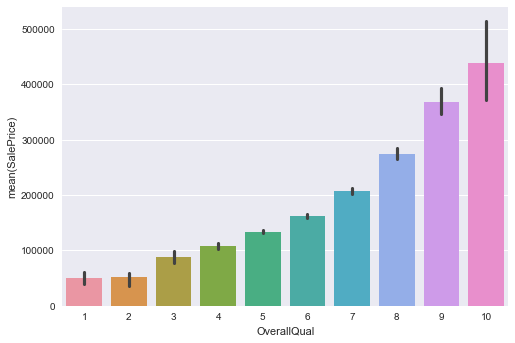

Has null: False


In [145]:
show_categorical('OverallQual')

#### Overall Cond (Ordinal): Rates the overall condition of the house

[5 8 6 7 4 2 3 9 1]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


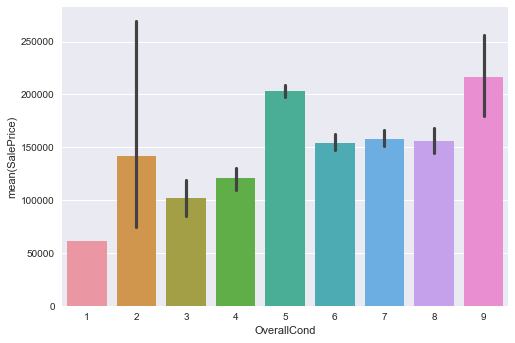

Has null: False


In [148]:
show_categorical('OverallCond')

#### Year Built (Discrete): Original construction date

In [159]:
def show_discrete(feature):
    train_df[feature].unique()
    plt.scatter(train_df[feature], train_df['SalePrice'], alpha=.6)
    plt.show()
    print('Has null: %s' % train_df[feature].isnull().any())

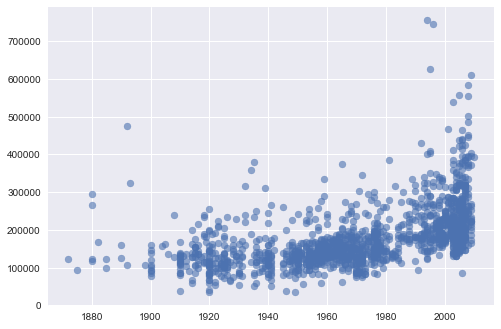

Has null: False


In [160]:
show_discrete('YearBuilt')

#### Year Remod/Add (Discrete): Remodel date (same as construction date if no remodeling or additions)

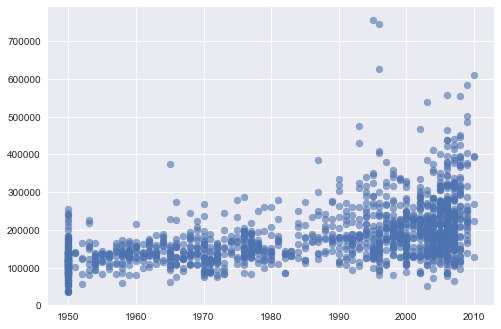

Has null: False


In [163]:
show_discrete('YearRemodAdd')

In [164]:
#### Roof Style (Nominal): Type of roof

['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


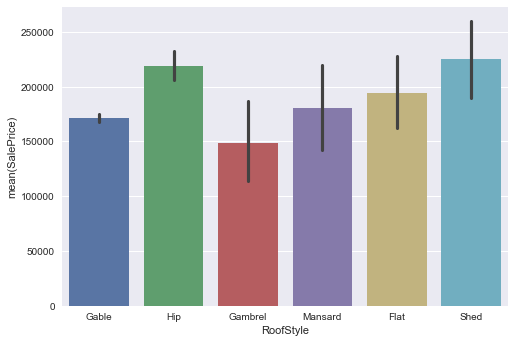

Has null: False


In [165]:
show_categorical('RoofStyle')

In [168]:
#### Roof Matl (Nominal): Roof material

['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll' 'ClyTile']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


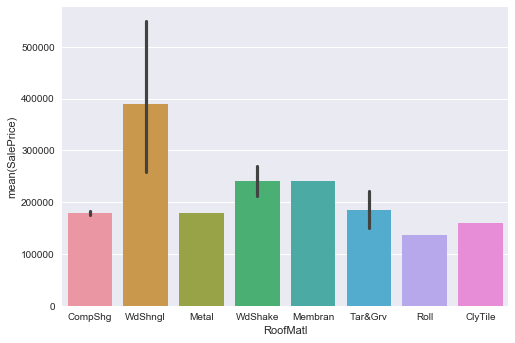

Has null: False


In [169]:
show_categorical('RoofMatl')

#### Exterior 1 (Nominal): Exterior covering on house

['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


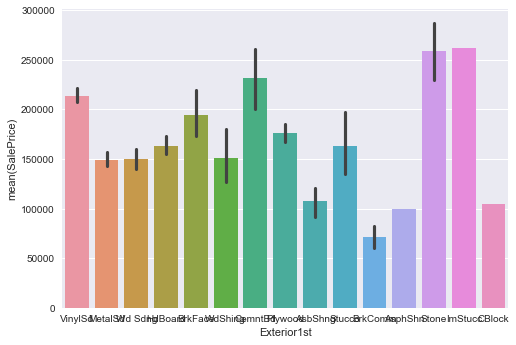

Has null: False


In [174]:
show_categorical('Exterior1st')

#### Exterior 2 (Nominal): Exterior covering on house (if more than one material)

In [177]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone' 'Other'
 'CBlock']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


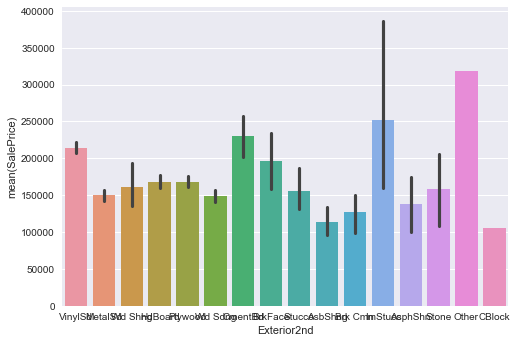

Has null: False


In [178]:
show_categorical('Exterior2nd')

#### Mas Vnr Type (Nominal): Masonry veneer type

['BrkFace' 'None' 'Stone' 'BrkCmn' nan]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


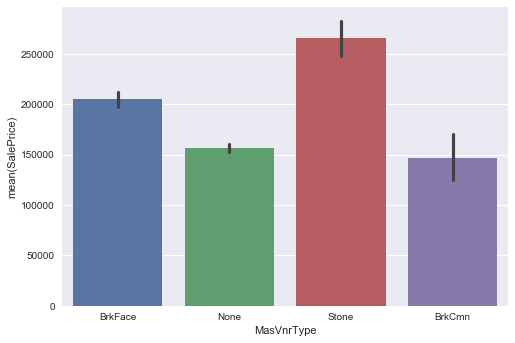

Has null: True


In [180]:
show_categorical('MasVnrType')

In [197]:
print('Number of nulls: %s' % train_df['MasVnrType'].isnull().sum())
print('Percentage of nulls: %.4f' % (train_df['MasVnrType'].isnull().sum() / len(train_df)))

Number of nulls: 8
Percentage of nulls: 0.0055


#### Mas Vnr Area (Continuous): Masonry veneer area in square feet

In [199]:
def show_continuous(feature):
    plt.scatter(train_df[feature], train_df['SalePrice'], alpha=.6)
    plt.show()
    print('Has null: %s' % train_df[feature].isnull().any())

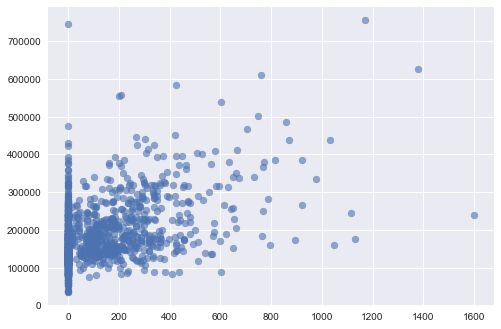

Has null: True


In [200]:
show_continuous('MasVnrArea')

In [202]:
def count_nans(feature):
    print('Number of nulls: %s' % train_df[feature].isnull().sum())
    print('Percentage of nulls: %.4f' % (train_df[feature].isnull().sum() / len(train_df)))

In [203]:
count_nans('MasVnrArea')

Number of nulls: 8
Percentage of nulls: 0.0055


#### Exter Qual (Ordinal): Evaluates the quality of the material on the exterior 

['Gd' 'TA' 'Ex' 'Fa']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


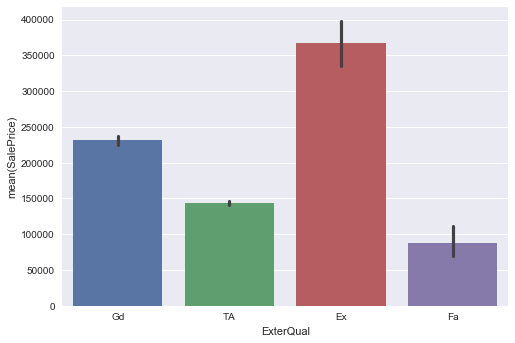

Has null: False


In [205]:
show_categorical('ExterQual')

#### Exter Cond (Ordinal): Evaluates the present condition of the material on the exterior

['TA' 'Gd' 'Fa' 'Po' 'Ex']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


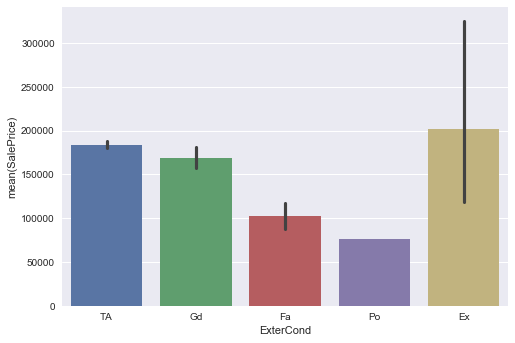

Has null: False


In [207]:
show_categorical('ExterCond')

#### Foundation (Nominal): Type of foundation

['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


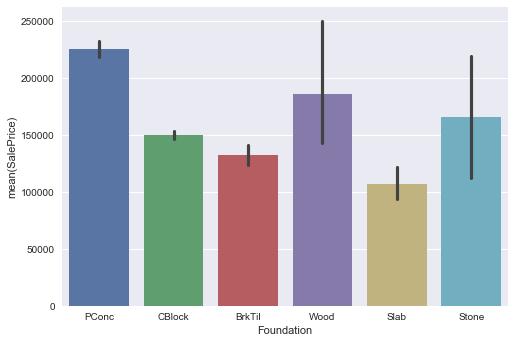

Has null: False


In [209]:
show_categorical('Foundation')

#### Bsmt Qual (Ordinal): Evaluates the height of the basement

['Gd' 'TA' 'Ex' nan 'Fa']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


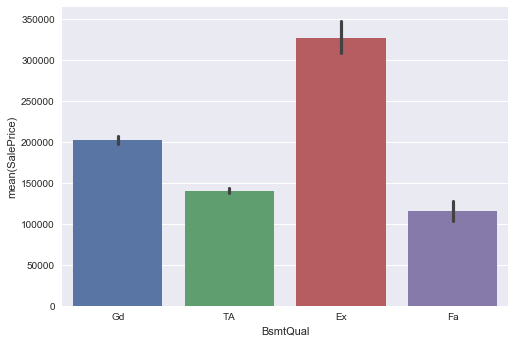

Has null: True


In [211]:
show_categorical('BsmtQual')

In [212]:
count_nans('BsmtQual')

Number of nulls: 37
Percentage of nulls: 0.0253


#### Bsmt Cond (Ordinal): Evaluates the general condition of the basement

['TA' 'Gd' nan 'Fa' 'Po']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


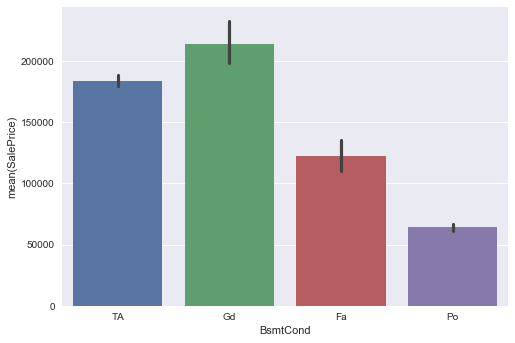

Has null: True


In [214]:
show_categorical('BsmtCond')

In [215]:
count_nans('BsmtCond')

Number of nulls: 37
Percentage of nulls: 0.0253


#### Bsmt Exposure	(Ordinal): Refers to walkout or garden level walls

['No' 'Gd' 'Mn' 'Av' nan]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


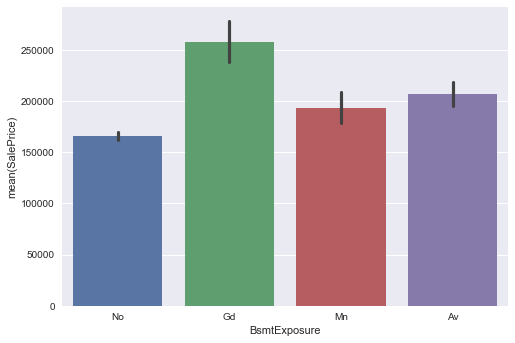

Has null: True


In [217]:
show_categorical('BsmtExposure')

In [218]:
count_nans('BsmtExposure')

Number of nulls: 38
Percentage of nulls: 0.0260


#### BsmtFin Type 1	(Ordinal): Rating of basement finished area

['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


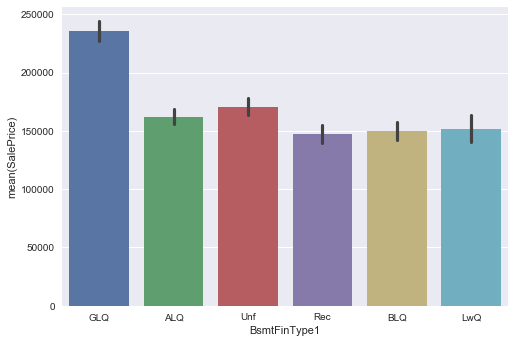

Has null: True
Number of nulls: 37
Percentage of nulls: 0.0253


In [222]:
show_categorical('BsmtFinType1')

#### BsmtFin SF 1 (Continuous): Type 1 finished square feet

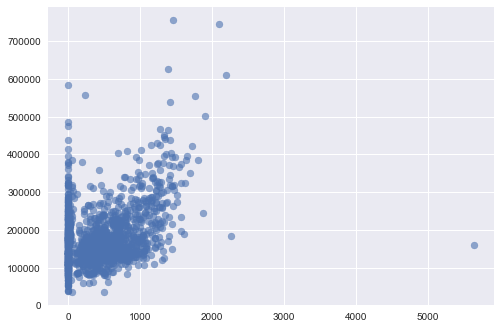

Has null: False


In [224]:
show_continuous('BsmtFinSF1')

In [225]:
train_df[train_df['BsmtFinSF1'] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


#### BsmtFinType 2	(Ordinal): Rating of basement finished area (if multiple types)

['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


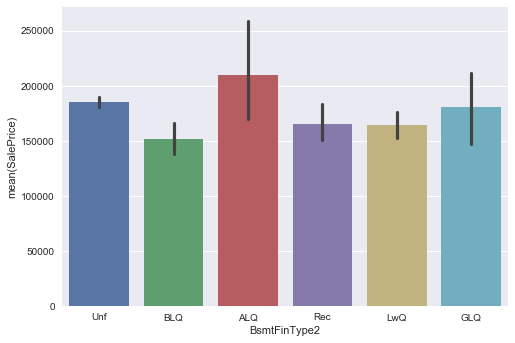

Has null: True
Number of nulls: 38
Percentage of nulls: 0.0260


In [227]:
show_categorical('BsmtFinType2')

#### BsmtFin SF 2 (Continuous): Type 2 finished square feet

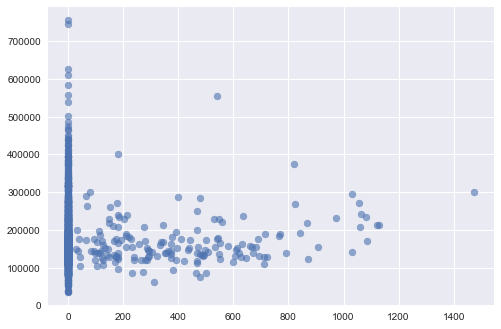

Has null: False


In [230]:
show_continuous('BsmtFinSF2')

#### Bsmt Unf SF (Continuous): Unfinished square feet of basement area

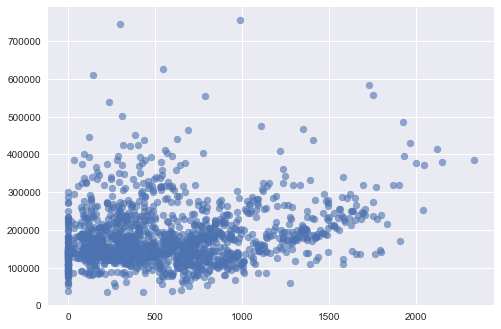

Has null: False


In [232]:
show_continuous('BsmtUnfSF')

#### Total Bsmt SF (Continuous): Total square feet of basement area

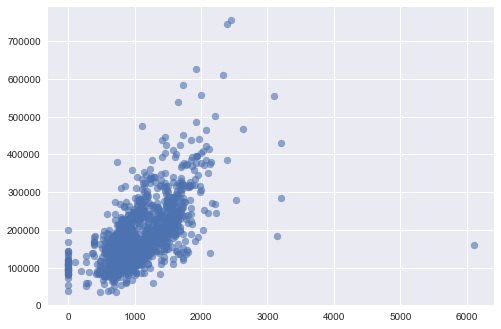

Has null: False


In [234]:
show_continuous('TotalBsmtSF')

#### Heating	(Nominal): Type of heating

['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


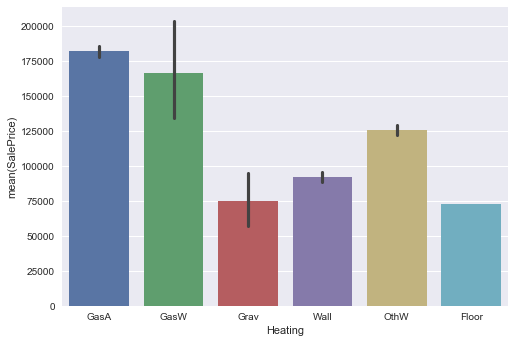

Has null: False


In [236]:
show_categorical('Heating')

#### HeatingQC (Ordinal): Heating quality and condition

['Ex' 'Gd' 'TA' 'Fa' 'Po']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


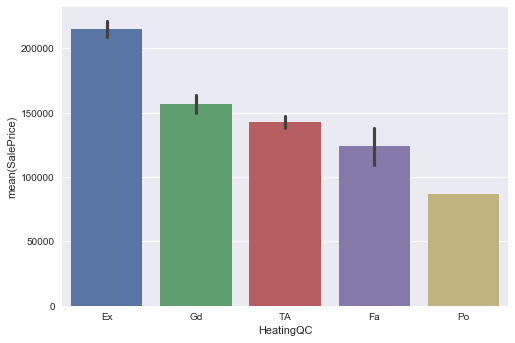

Has null: False


In [238]:
show_categorical('HeatingQC')

#### Central Air (Nominal): Central air conditioning

['Y' 'N']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


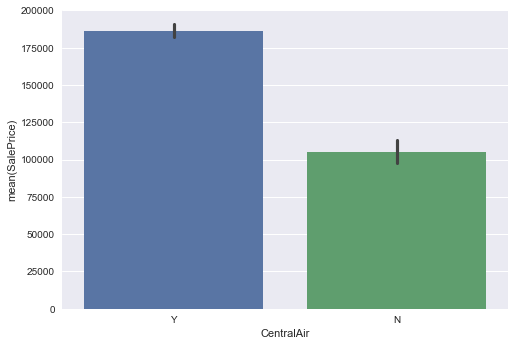

Has null: False


In [240]:
show_categorical('CentralAir')

#### Electrical (Ordinal): Electrical system

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


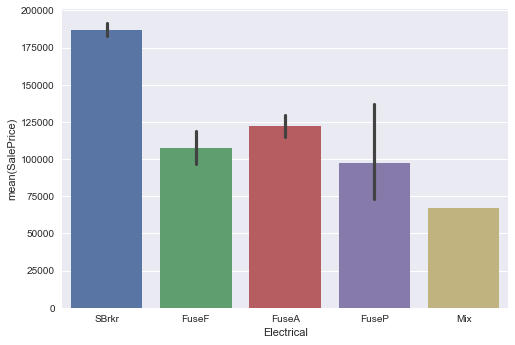

Has null: True
Number of nulls: 1
Percentage of nulls: 0.0007


In [242]:
show_categorical('Electrical')

#### 1st Flr SF (Continuous): First Floor square feet

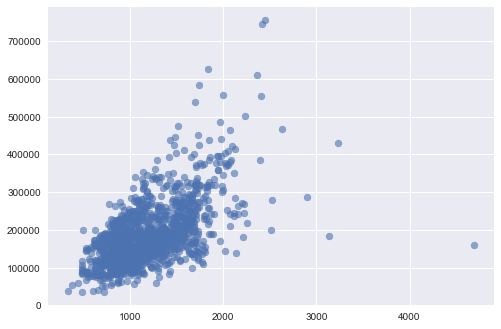

Has null: False


In [281]:
show_continuous('1stFlrSF')

#### 2nd Flr SF (Continuous)	: Second floor square feet

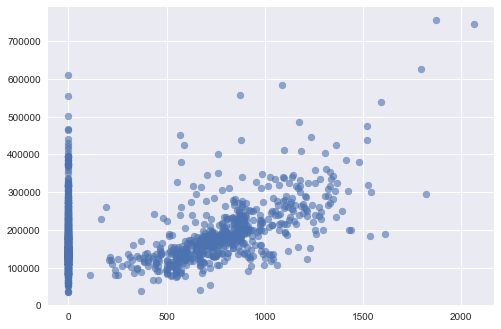

Has null: False


In [283]:
show_continuous('2ndFlrSF')

#### Low Qual Fin SF (Continuous): Low quality finished square feet (all floors)

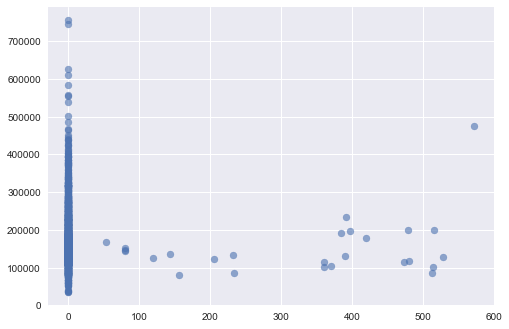

Has null: False


In [284]:
show_continuous('LowQualFinSF')

#### Gr Liv Area (Continuous): Above grade (ground) living area square feet

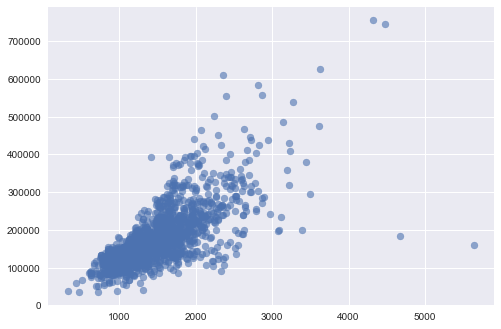

Has null: False


In [285]:
show_continuous('GrLivArea')

#### Bsmt Full Bath (Discrete): Basement full bathrooms

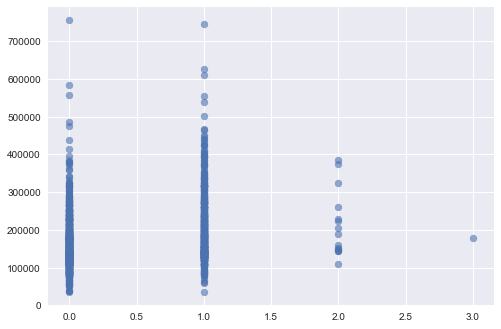

Has null: False


In [286]:
show_discrete('BsmtFullBath')

#### Bsmt Half Bath (Discrete): Basement half bathrooms

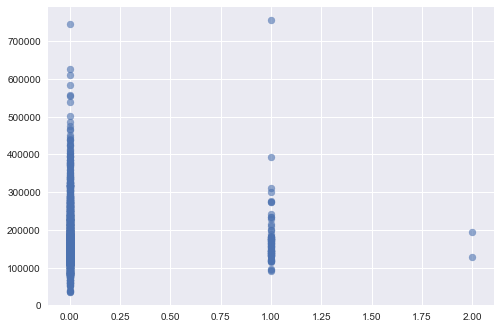

Has null: False


In [287]:
show_discrete('BsmtHalfBath')

#### Full Bath (Discrete): Full bathrooms above grade

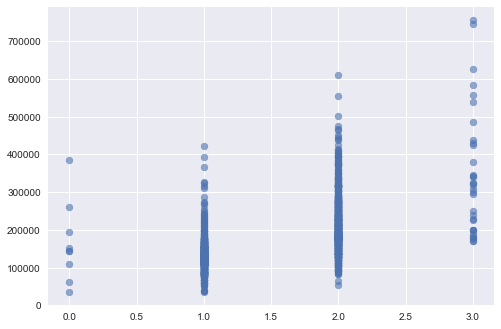

Has null: False


In [292]:
show_discrete('FullBath')

#### Half Bath (Discrete): Half baths above grade

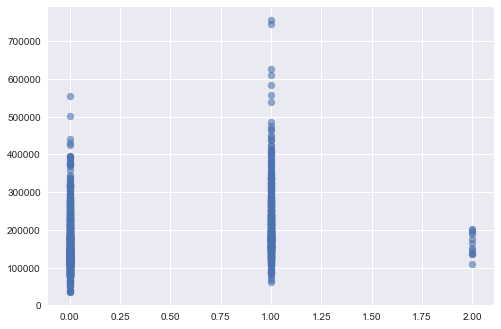

Has null: False


In [293]:
show_discrete('HalfBath')

#### Bedroom (Discrete): Bedrooms above grade (does NOT include basement bedrooms)

In [294]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

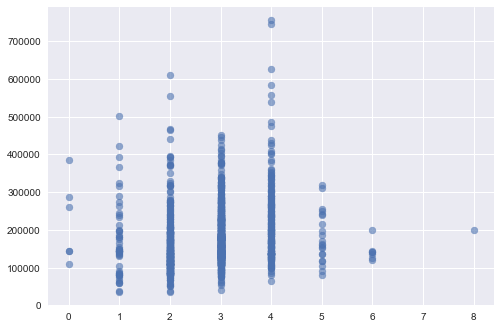

Has null: False


In [295]:
show_discrete('BedroomAbvGr')

#### Kitchen (Discrete): Kitchens above grade

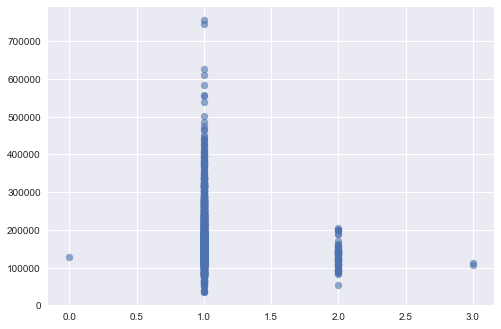

Has null: False


In [296]:
show_discrete('KitchenAbvGr')

#### KitchenQual (Ordinal): Kitchen quality

['Gd' 'TA' 'Ex' 'Fa']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


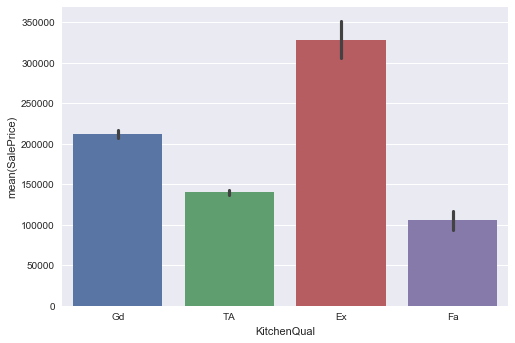

Has null: False


In [297]:
show_categorical('KitchenQual')

#### TotRmsAbvGrd	(Discrete): Total rooms above grade (does not include bathrooms)

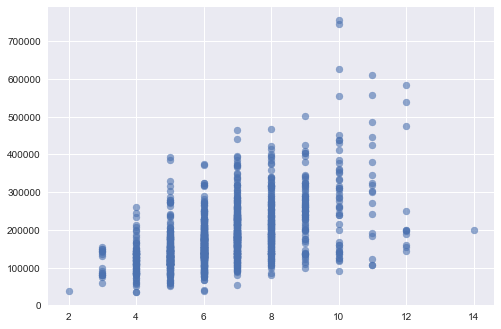

Has null: False


In [298]:
show_discrete('TotRmsAbvGrd')

#### Functional (Ordinal): Home functionality (Assume typical unless deductions are warranted)

['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


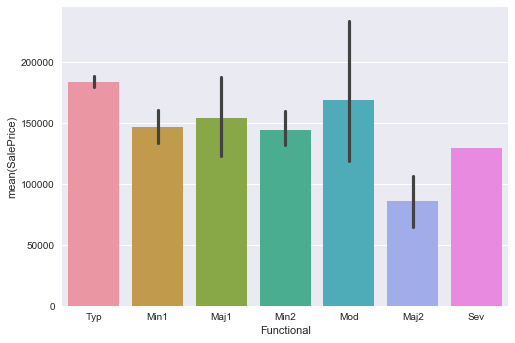

Has null: False


In [299]:
show_categorical('Functional')

#### Fireplaces (Discrete): Number of fireplaces

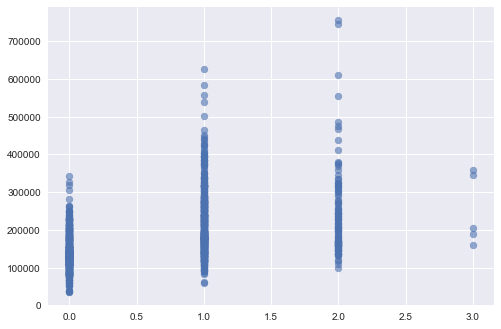

Has null: False


In [300]:
show_discrete('Fireplaces')

#### FireplaceQu (Ordinal): Fireplace quality

[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


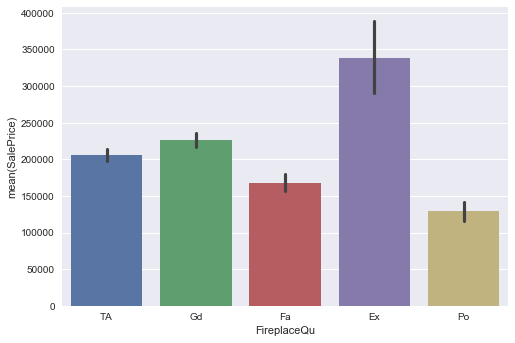

Has null: True
Number of nulls: 690
Percentage of nulls: 0.4726


In [301]:
show_categorical('FireplaceQu')

#### Garage Type (Nominal): Garage location

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


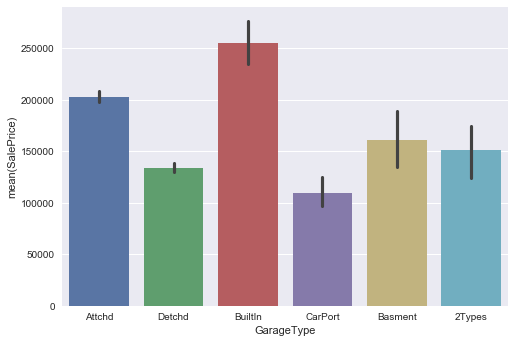

Has null: True
Number of nulls: 81
Percentage of nulls: 0.0555


In [302]:
show_categorical('GarageType')

#### Garage Yr Blt (Discrete): Year garage was built

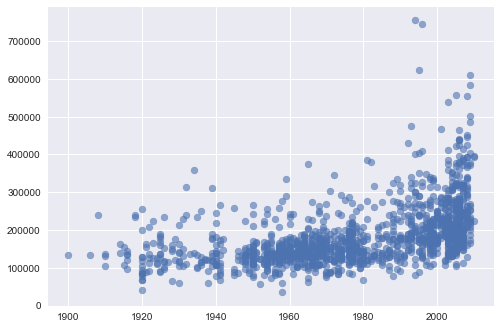

Has null: True


In [303]:
show_discrete('GarageYrBlt')

In [304]:
count_nans('GarageYrBlt')

Number of nulls: 81
Percentage of nulls: 0.0555


#### Garage Finish (Ordinal)	: Interior finish of the garage

['RFn' 'Unf' 'Fin' nan]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


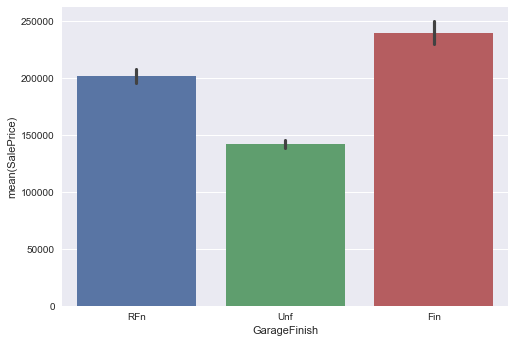

Has null: True
Number of nulls: 81
Percentage of nulls: 0.0555


In [305]:
show_categorical('GarageFinish')

#### Garage Cars (Discrete): Size of garage in car capacity

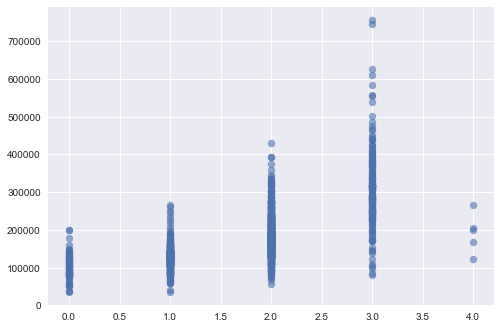

Has null: False


In [306]:
show_discrete('GarageCars')

#### Garage Area (Continuous): Size of garage in square feet

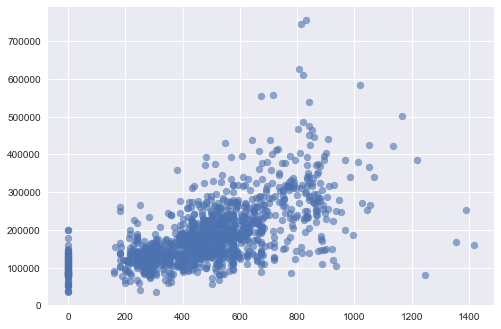

Has null: False


In [307]:
show_continuous('GarageArea')

In [309]:
train_df[train_df['GarageArea'] > 1200]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


#### Garage Qual (Ordinal): Garage quality

['TA' 'Fa' 'Gd' nan 'Ex' 'Po']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


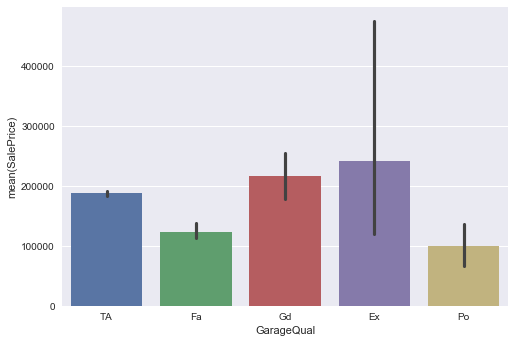

Has null: True
Number of nulls: 81
Percentage of nulls: 0.0555


In [308]:
show_categorical('GarageQual')

#### Garage Cond (Ordinal): Garage condition

['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


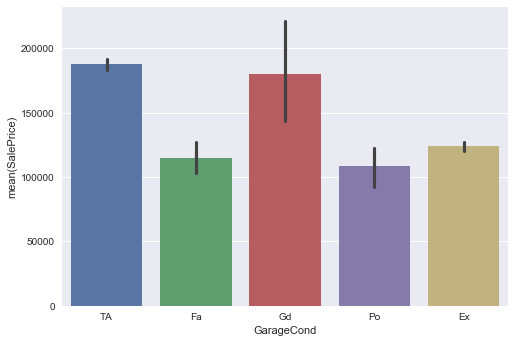

Has null: True
Number of nulls: 81
Percentage of nulls: 0.0555


In [310]:
show_categorical('GarageCond')

#### Paved Drive (Ordinal): Paved driveway

['Y' 'N' 'P']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


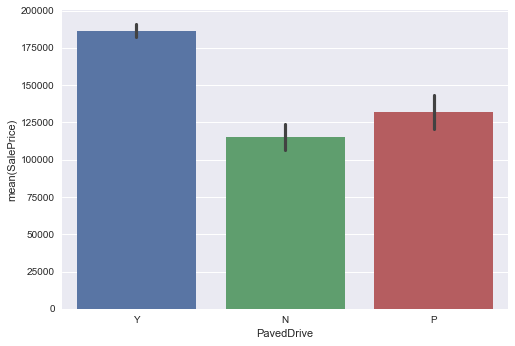

Has null: False


In [311]:
show_categorical('PavedDrive')

#### Wood Deck SF (Continuous): Wood deck area in square feet

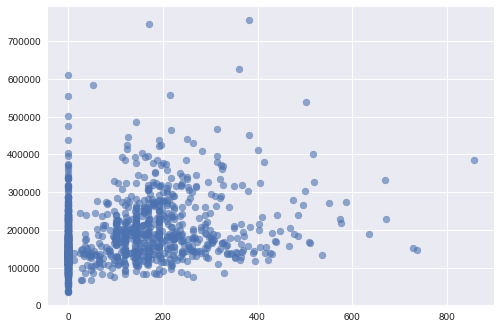

Has null: False


In [312]:
show_continuous('WoodDeckSF')

#### Open Porch SF (Continuous): Open porch area in square feet

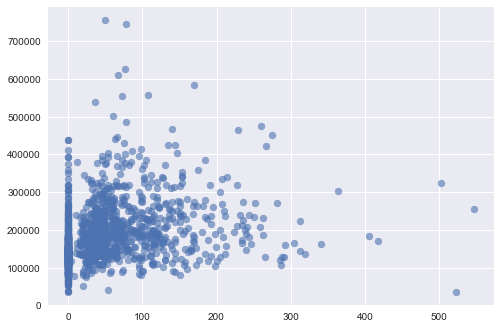

Has null: False


In [313]:
show_continuous('OpenPorchSF')

#### Enclosed Porch (Continuous): Enclosed porch area in square feet

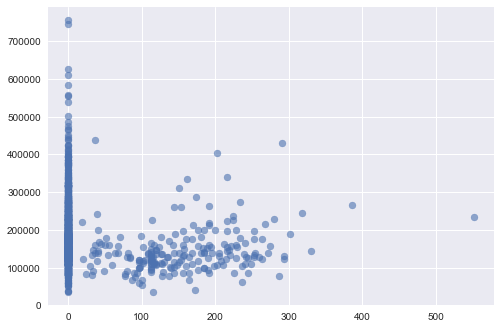

Has null: False


In [315]:
show_continuous('EnclosedPorch')

#### 3-Ssn Porch (Continuous): Three season porch area in square feet

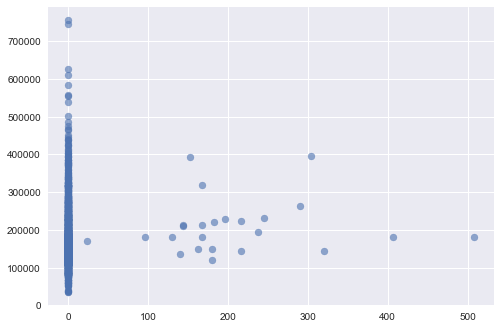

Has null: False


In [316]:
show_continuous('3SsnPorch')

#### Screen Porch (Continuous): Screen porch area in square feet

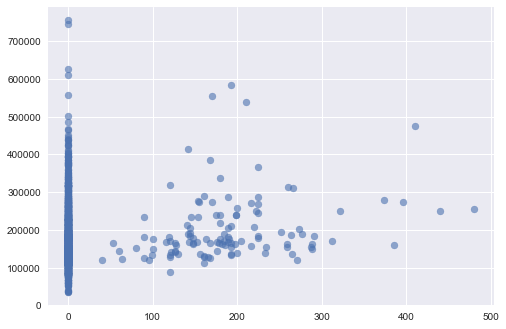

Has null: False


In [317]:
show_continuous('ScreenPorch')

#### Pool Area (Continuous): Pool area in square feet

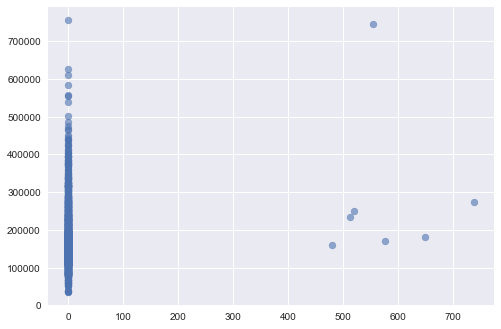

Has null: False


In [318]:
show_continuous('PoolArea')

#### Pool QC (Ordinal): Pool quality 

[nan 'Ex' 'Fa' 'Gd']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


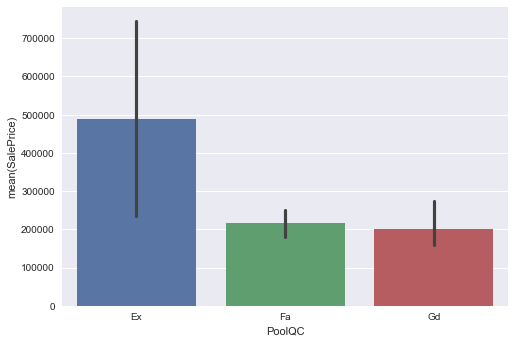

Has null: True
Number of nulls: 1453
Percentage of nulls: 0.9952


In [319]:
show_categorical('PoolQC')

#### Fence (Ordinal): Fence quality

[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


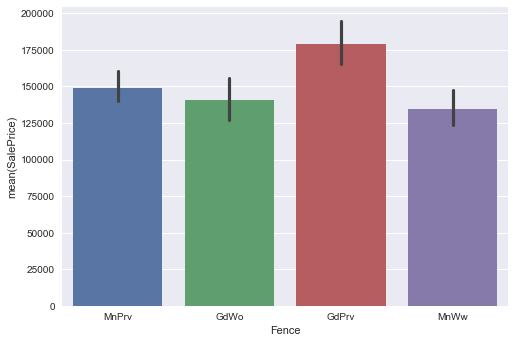

Has null: True
Number of nulls: 1179
Percentage of nulls: 0.8075


In [320]:
show_categorical('Fence')

#### Misc Feature (Nominal): Miscellaneous feature not covered in other categories

[nan 'Shed' 'Gar2' 'Othr' 'TenC']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


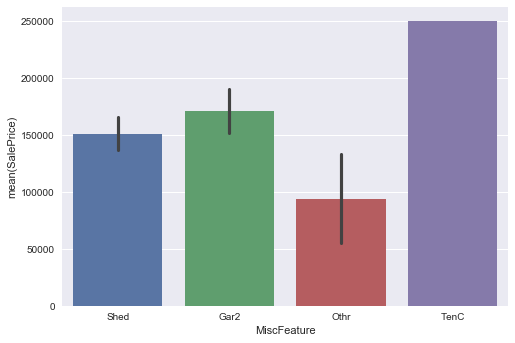

Has null: True
Number of nulls: 1406
Percentage of nulls: 0.9630


In [321]:
show_categorical('MiscFeature')

#### Misc Val (Continuous): $Value of miscellaneous feature

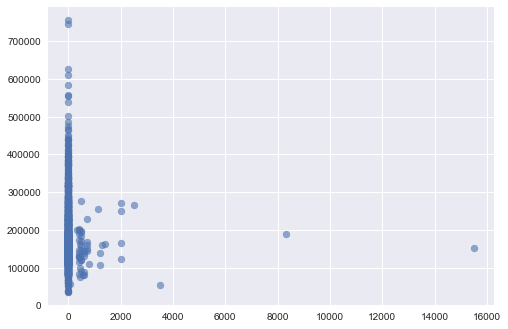

Has null: False


In [322]:
show_continuous('MiscVal')

#### Mo Sold (Discrete): Month Sold (MM)

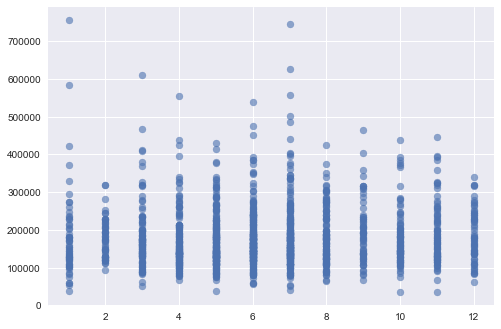

Has null: False


In [323]:
show_continuous('MoSold')

#### Yr Sold (Discrete): Year Sold (YYYY)

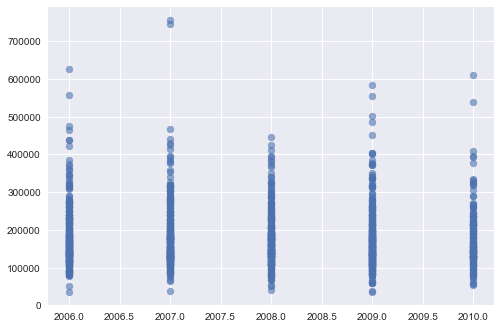

Has null: False


In [324]:
show_continuous('YrSold')

#### Sale Type (Nominal): Type of sale

['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


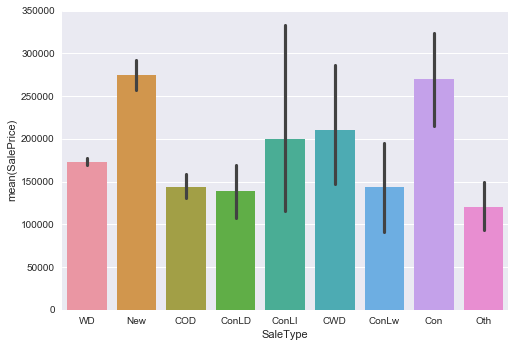

Has null: False


In [325]:
show_categorical('SaleType')

#### Sale Condition (Nominal): Condition of sale

['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


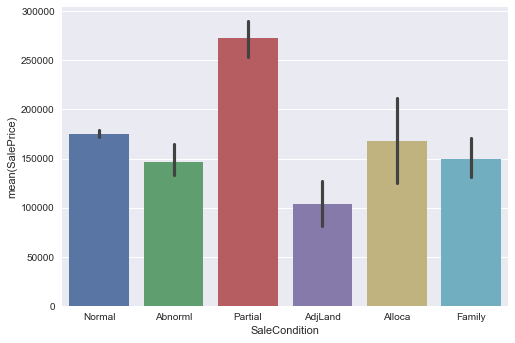

Has null: False


In [326]:
show_categorical('SaleCondition')